### Part 1: Building a Feed-Forward Neural Network from Scratch 
- Using just NumPy
- ``m.predict()``

In [1]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=50, noise=0.2, random_state=42)

In [2]:
import matplotlib.pyplot as plt

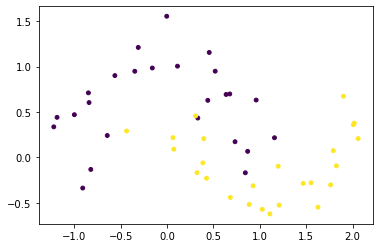

In [3]:
plt.scatter(X[:,0], X[:,1], s=15, c=y)

In [4]:
import numpy as np

In [5]:
#manually add a column for bias
X = np.hstack([X, np.ones((X.shape[0], 1 ))])

In [6]:
#let's model our neurons / activation functions as a sigmoid function

In [7]:
def sigmoid(x):
    """logistic function.
    
    takes in a single number, and squishes it
    between 0 and 1.
    """
    
    return 1 / (1 + np.exp(-x))
    
    

In [8]:
a = np.array([-10.0, -1.0, 0.0, 1.0, 10.0])
expected = np.array([0.0, 0.27, 0.5, 0.73, 1.0])

assert np.all(sigmoid(a).round(2) == expected)

---

**the values of the arrows == weights == parameters**

In [9]:
hidden_weights = np.random.normal(loc=0.0, scale=1.0, size=(3, 2))   # 3 inputs feeding into 2 neurons
outer_weights = np.random.normal(loc=0.0, scale=1.0, size=(3, 1)) # 3 inputs feeding into 1 neuron

In [10]:
hidden_weights

array([[ 1.23541868,  0.89212009],
       [-1.64628308,  0.42391178],
       [ 0.30024682, -1.05468933]])

In [11]:
outer_weights

array([[ 0.50532613],
       [ 1.6136658 ],
       [-2.57796371]])

---

In [12]:
weights = [hidden_weights, outer_weights]

In [13]:
weights

[array([[ 1.23541868,  0.89212009],
        [-1.64628308,  0.42391178],
        [ 0.30024682, -1.05468933]]),
 array([[ 0.50532613],
        [ 1.6136658 ],
        [-2.57796371]])]

In [14]:
def feed_forward(X, weights):

    """
    1. Calculate the dot product of X
       and the weights of the first layer.
    """
    
    # (N, 3) * (3, 2) -> (N, 2)
    step1 = np.dot(X, weights[0])
    
    """
    2. Apply the sigmoid function on the result.
    """
    
    # (N, 2) -> (N, 2)
    step2 = sigmoid(step1)

    """
    3. Append an extra column of ones to the result (i.e. the bias).
    """
    #(N, 2) -> (N, 3)
    
    step3 = np.hstack([step2, np.ones((step2.shape[0], 1))])
    
    
    """
    4. Calculate the dot product of the previous step
       with the weights of the second (i.e. outer) layer.
    """
    # (N, 3) * (3, 1) -> (N, 1)
    step4 = np.dot(step3, weights[1])
    
    
    """
    5. Apply the sigmoid function on the result.
    """
    # (N, 1) -> (N, 1)
    step5 = sigmoid(step4)
    
    
    """
    6. Return all intermediate results (i.e. anything that is outputted
       by an activation function).
    """
   

    return step2, step5

How a neural network "calculates":
1. Add bias
2. Multiply by weights
3. Activate

In [15]:
out1, out2 = feed_forward(X, weights)

In [16]:
weights

[array([[ 1.23541868,  0.89212009],
        [-1.64628308,  0.42391178],
        [ 0.30024682, -1.05468933]]),
 array([[ 0.50532613],
        [ 1.6136658 ],
        [-2.57796371]])]

### Part 2: Training the Neural Network
- Using an algorithm like Gradient Descent.
- General idea is to slowly (in increments) tweak the paramters such that the prediction is better than before.
- ``m.fit()``

In [17]:
#Get Loss Function - Logarithmic Loss
def log_loss(ytrue, ypred):
    loss = -(ytrue*np.log(ypred)+(1-ytrue)*np.log(1-ypred))
    return loss

In [18]:
ytrue = np.array([0.0, 0.0, 1.0, 1.0])
ypred = np.array([0.01, 0.99, 0.01, 0.99])
expected = np.array([0.01, 4.61, 4.61, 0.01])
assert np.all(log_loss(ytrue, ypred).round(2) == expected)

In [19]:
def backprop(weights,output1,output2,ytrue,X_input, LR_O, LR_H):  
    #separate learning rates for outer and inner weights.
    
    wH = weights[0]
    wO = weights[1]
    
    #Equation A:
    ytrue = ytrue.reshape(-1, 1) 
    error = (output2 - ytrue) * log_loss(ytrue , output2) 
   
    #Equation B:
    sig_deriv = output2 * ( 1 - output2) 
    #derivative of the sigmoid function with respect to the hidden output * weights
    y_grad = sig_deriv * error
    
    #Equation C:
    hidden_out_with_bias = np.hstack([output1,np.ones((output1.shape[0] ,1))]) #don't forget the bias!
    delta_wo = np.dot( -y_grad.transpose(), hidden_out_with_bias ) * LR_O
    
    #and finally, old weights + delta weights -> new weights!
    wO_new = wO + delta_wo.transpose()

    #Equation D:
    sig_deriv_2 = output1 * ( 1 - output1)
    H_grad = sig_deriv_2  * np.dot(y_grad , wO[:2].transpose()) 
    #exclude the bias (3rd column) of the outer weights, since it is not backpropagated!
    
    #Equation E:
    delta_wH = np.dot(-H_grad.transpose(), X_input ) * LR_H
    wH_new = wH + delta_wH.transpose() #old weights + delta weights -> new weights!
    
    return wH_new, wO_new

In [20]:
wH_new, wO_new = backprop(weights, out1, out2, y, X, 0.1, 5.0)

In [21]:
new_weights = [wH_new, wO_new]

In [22]:
weights

[array([[ 1.23541868,  0.89212009],
        [-1.64628308,  0.42391178],
        [ 0.30024682, -1.05468933]]),
 array([[ 0.50532613],
        [ 1.6136658 ],
        [-2.57796371]])]

In [23]:
new_weights

[array([[ 2.36681617, 10.61399078],
        [-1.63272321, -0.67841927],
        [ 1.86549954,  7.94624346]]),
 array([[ 0.90617921],
        [ 1.8429558 ],
        [-2.08354962]])]

In [24]:
print(new_weights[0].shape, new_weights[1].shape)
#shapes look right!!

(3, 2) (3, 1)


### A nice way to manually calculate the accuracy of the initial guess:
- flatten both ytrue and ypred (so that they're both (50,) arrays)
- round the ypred (either up to 1 or down to 0)
- then compare them to eachother to get a boolean array (True where the values are the same, False where they are not)
- sum the boolean array and divide by the length (i.e. take the mean)

In [25]:
def get_accuracy(ypred,ytrue):
    acc = sum(ytrue.flatten() == ypred.flatten().round().astype(np.int64))
    return acc/len(ytrue)

### Run the Backpropagation Algorithm

- Randomly initialize the weights again, to see how the initial position might affect the results/

In [26]:
hidden_weights = np.random.normal(loc=0.0, scale=1.0, size=(3, 2))   # 3 inputs feeding into 2 neurons
outer_weights = np.random.normal(loc=0.0, scale=1.0, size=(3, 1)) # 3 inputs feeding into 1 neuron
weights = [hidden_weights, outer_weights]

In [27]:
ACC_VEC = []
LOSS_VEC = []
for i in range(500):
    out1, out2 =  feed_forward(X, weights)
    ACC_VEC.append(get_accuracy(out2,y))
    LOSS_VEC.append(sum(log_loss(y, out2))[0])
    new_weights = backprop(weights,out1,out2,y,X, .01, 5)
    weights = new_weights

Text(0.5, 1.0, 'ACCURACY OVER TRAINING EPOCHS')

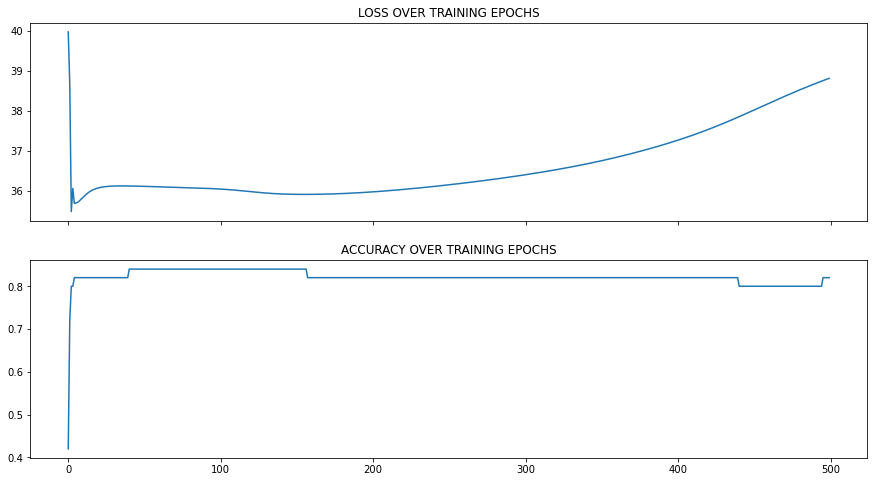

In [28]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15, 8))
ax1.plot(LOSS_VEC)
ax1.set_title('LOSS OVER TRAINING EPOCHS')
ax2.plot(ACC_VEC)
ax2.set_title('ACCURACY OVER TRAINING EPOCHS')